# Math 3080 Final Project
**Dusty Shaw**


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Load the data
test = pd.read_csv("Data/test.csv", index_col='Id');
train = pd.read_csv("Data/train.csv", index_col='Id');

display(test.head());
display(train.head());

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Inspect the Data

Now that we have the data loaded in, let's see what we have in both the testint and the training sets. I will first describe the data to inspect the ranges and datatypes of each variable. 

In [132]:
# Begin EDA
print(test.describe());

        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  ...   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342  ...   
std      30.390071     21.130467   177.625900   455.268042   176.753926  ...   
min 

In [133]:
rows, cols = test.shape;
print("TEST DATA\nRows: "+ str(rows) +" Columns: " + str(cols))

rows2, cols2 = train.shape;
print("TRAIN DATA\nRows: "+ str(rows2) +" Columns: " + str(cols2))

TEST DATA
Rows: 1459 Columns: 79
TRAIN DATA
Rows: 1460 Columns: 80


## Find Missing Values

Now that we know the general shape of the data, we can see that there are a lot of columns and that each data set has relatively the same amount of observations. 

To find missing values, we use the `isnull()` in combination with the summation function in python. This will give us a count of how many values are null in each of our columns.

We can visualize the amount of missing data by using Seaborn's heat map, yellow indicating any missing values. This can help us make informed decisions about how we might handle the missing data.

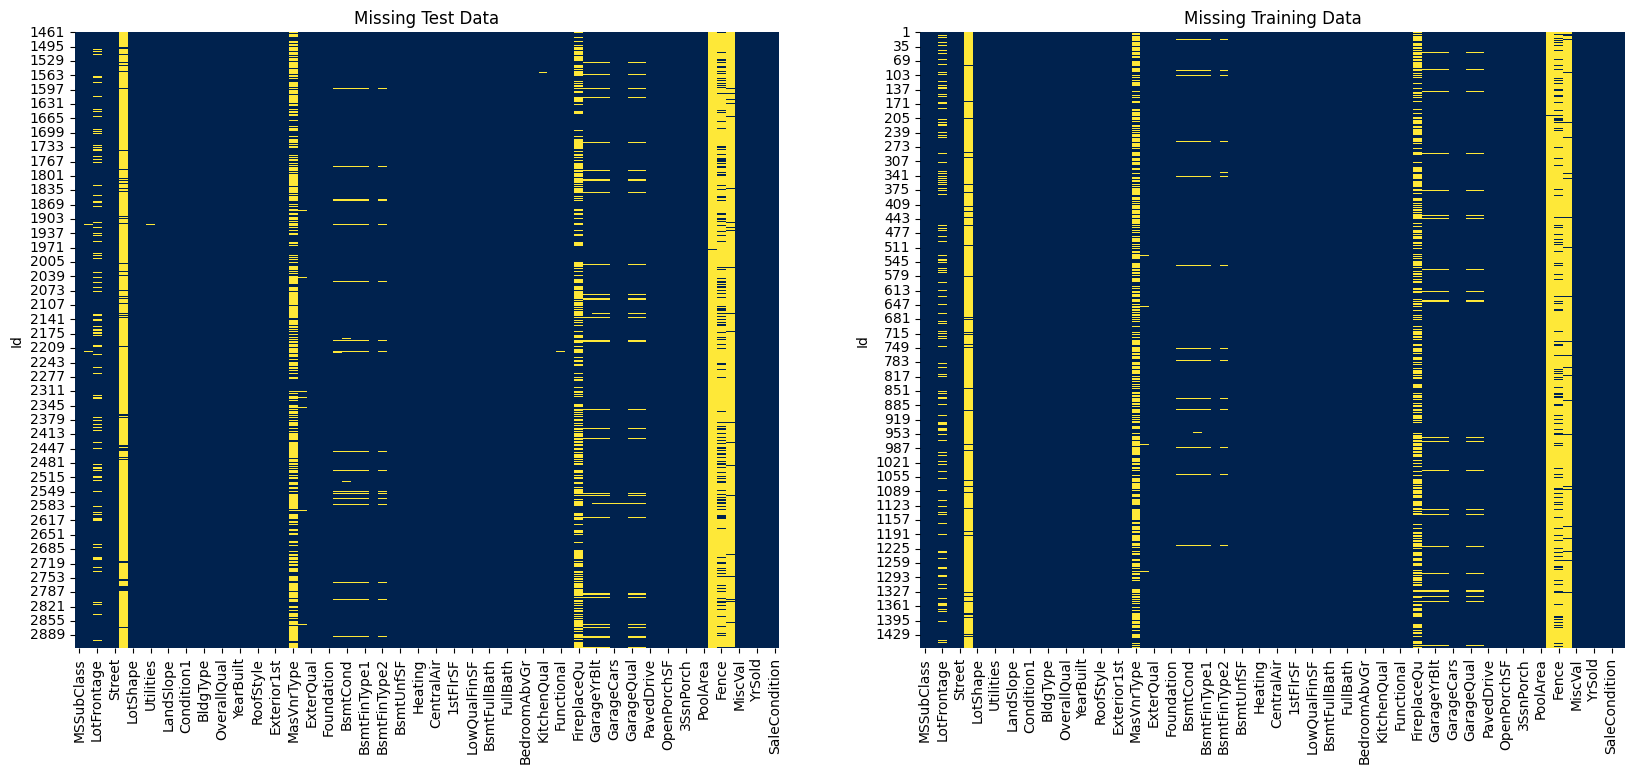

In [134]:
# Plot missing values in yellow
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(test.isnull(), cbar=False, cmap='cividis', ax=axes[0])
sns.heatmap(train.isnull(), cbar=False, cmap='cividis', ax=axes[1])

axes[0].set_title('Missing Test Data')
axes[1].set_title('Missing Training Data')

plt.show()

## Clean the Data

From both the training and testing data set, I can see that there are a few columns that might be a problem. 

Let's print the number of columns that have more than half of their data missing.

After we have the columns, we should drop those columns for both datasets. 

In [135]:
# find which columns have more than 50% of their data as null.
high_nulls = (train.isnull().sum() / len(train))

print("Column     | Percentage Null\n-------------------------------")
print(high_nulls[high_nulls > 0.5])

Column     | Percentage Null
-------------------------------
Alley          0.937671
MasVnrType     0.597260
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64


In [136]:
train = train.drop(columns=["Alley", "MasVnrType", "PoolQC", "Fence", "MiscFeature"])

In [137]:
high_nulls = (test.isnull().sum() / len(train))

print("Column     | Percentage Null\n-------------------------------")
print(high_nulls[high_nulls > 0.5])

Column     | Percentage Null
-------------------------------
Alley          0.926027
MasVnrType     0.612329
PoolQC         0.997260
Fence          0.800685
MiscFeature    0.964384
dtype: float64


In [138]:
test = test.drop(columns=["Alley", "MasVnrType", "PoolQC", "Fence", "MiscFeature"])

In [139]:
# Fill LotFrontage to 0. If it is null, I will assume there was 0 square feet. (LotFrontage: Linear feet of street connected to property)
test['LotFrontage'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

train['LotFrontage'].fillna(0, inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)

test['MSZoning'].dropna()

C:\Users\shust\AppData\Local\Temp\ipykernel_8680\1854380384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['LotFrontage'].fillna(0, inplace=True)
C:\Users\shust\AppData\Local\Temp\ipykernel_8680\1854380384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Id
1461    RH
1462    RL
1463    RL
1464    RL
1465    RL
        ..
2915    RM
2916    RM
2917    RL
2918    RL
2919    RL
Name: MSZoning, Length: 1455, dtype: object

In [140]:
test = test.dropna(subset=['MSZoning'])
train = train.dropna(subset=['MSZoning'])

test.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,75,0,0,0,0,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,20,RL,88.0,11577,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,225,0,0,0,0,0,9,2006,New,Partial
2907,160,RM,41.0,2665,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,5,2006,WD,Normal
2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,0,5,2006,WD,Normal


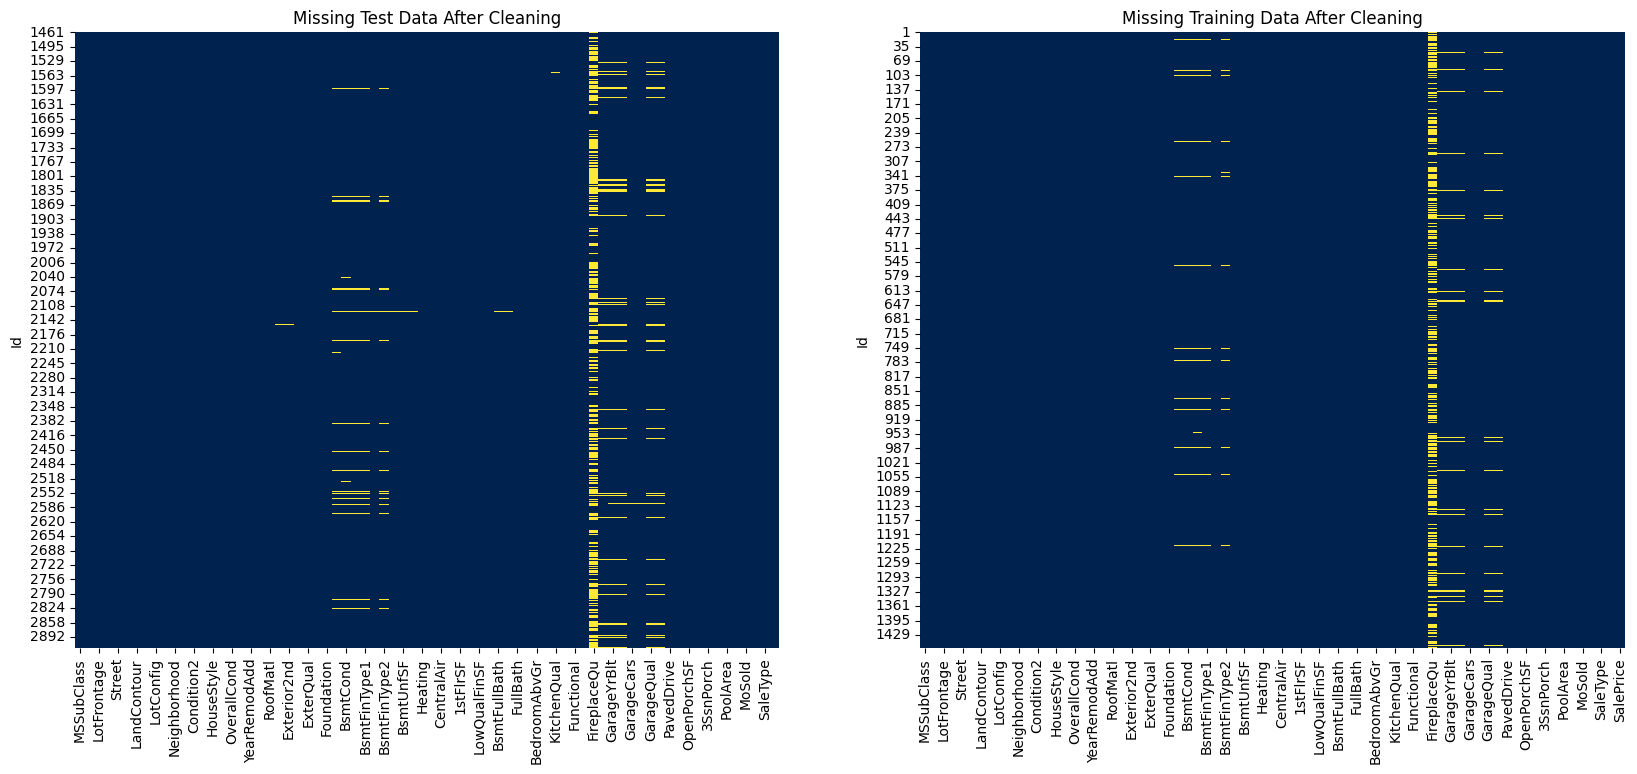

In [141]:
# Plot missing values in yellow
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(test.isnull(), cbar=False, cmap='cividis', ax=axes[0])
sns.heatmap(train.isnull(), cbar=False, cmap='cividis', ax=axes[1])

axes[0].set_title('Missing Test Data After Cleaning')
axes[1].set_title('Missing Training Data After Cleaning')

plt.show()

In [142]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

# Finding Outliers

<Axes: xlabel='SalePrice', ylabel='Count'>

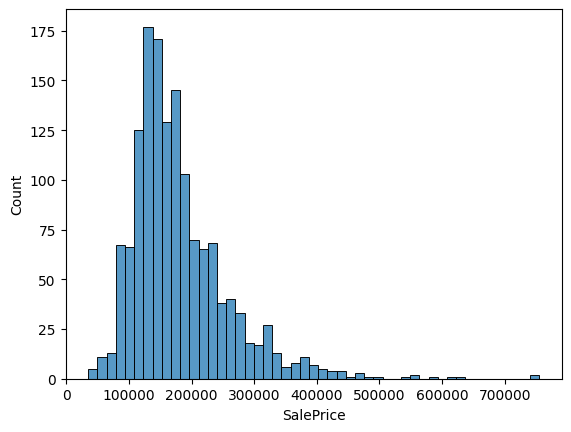

In [143]:
sns.histplot(x="SalePrice", data=train)

In [144]:

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers


outliers = find_outliers_IQR(train["SalePrice"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 61
max outlier value: 755000
min outlier value: 341000


# Create a Correlations Heat map
To see some correlations, we need to select our numeric variables and create a correlation matrix. We can plot this using Seaborn heatmap.

In [145]:
numeric_test = train.select_dtypes(["int", "float"])

In [146]:
correlations = numeric_test.corr()
# We know that everything with a 1 is correlating with itself, so we can ignore these
correlations_no1 = correlations.replace(1, 0, inplace=False)

maxValues = correlations_no1.unstack().sort_values().drop_duplicates().nlargest(5)
minValues = correlations_no1.unstack().sort_values().drop_duplicates().nsmallest(5)

print("Most positive correlations:")
display(maxValues)
print("---")
print("Most negative correlations:")
display(minValues)

Most positive correlations:


GarageArea    GarageCars     0.882475
YearBuilt     GarageYrBlt    0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     OverallQual    0.790982
dtype: float64

---
Most negative correlations:


BsmtUnfSF      BsmtFinSF1    -0.495251
BsmtFullBath   BsmtUnfSF     -0.422900
EnclosedPorch  YearBuilt     -0.387268
YearBuilt      OverallCond   -0.375983
GarageYrBlt    OverallCond   -0.324297
dtype: float64

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Name: SalePrice, dtype: float64

<Axes: >

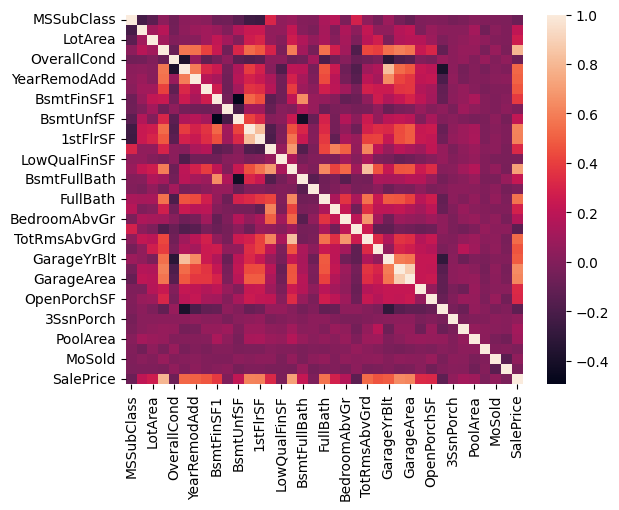

In [147]:
sns.heatmap(numeric_test.corr())

### Question One
This graph made me question what the most positive or negative correlations are with sales price in particular. 

In [160]:
print(numeric_test.corr()["SalePrice"].nlargest(6))
print(numeric_test.corr()["SalePrice"].nsmallest(6))

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Name: SalePrice, dtype: float64


[Text(0.5, 0, 'First Floor Square Footage'), Text(0, 0.5, 'Sale Price (USD)')]

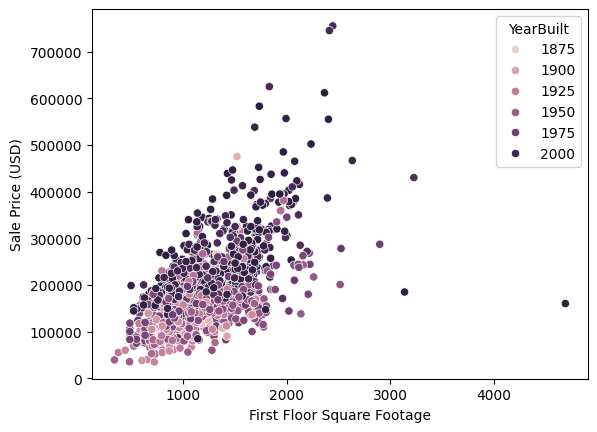

In [148]:
ax =sns.scatterplot(x="1stFlrSF", y="SalePrice", hue="YearBuilt", data=train)
ax.set(xlabel='First Floor Square Footage',
       ylabel='Sale Price (USD)')


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

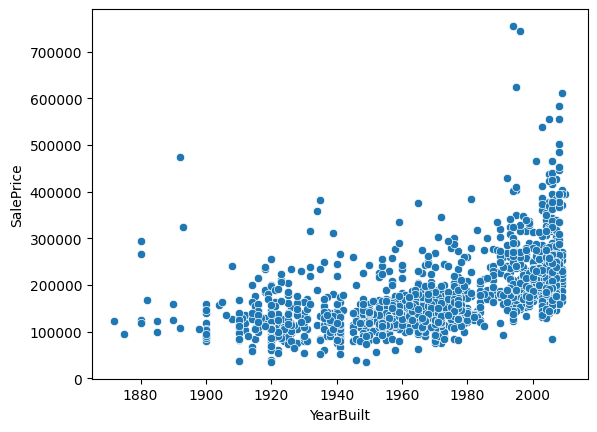

In [149]:
sns.scatterplot(x="YearBuilt", y="SalePrice", data=train)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

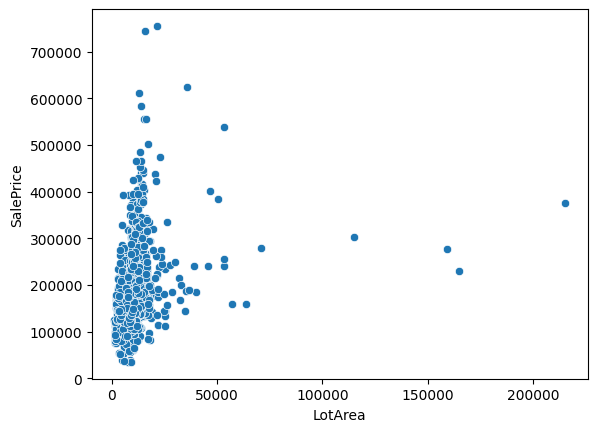

In [150]:
sns.scatterplot(x="LotArea", y="SalePrice", data=train)